<a href="https://colab.research.google.com/github/justgeekit/ZDot/blob/main/3D_Machine_Learning_Point_Cloud_Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by (c) Florent Poux. Licence MIT

*   To reuse in your project, please cite the most appropriate article from my Google Scholar page:
[To Google Scholar](https://scholar.google.com/citations?user=eoyJ6eYAAAAJ&hl=en)
*   Have fun with this notebook that you can very simply run (ctrl+Enter) !
*   The first time thought, it will ask you to get a key for it to be able to acces your Google drive folders if you want to work all remotely.
*   Simply accept, and then change the input path by the folder path containing your data, on Google Drive.

Enjoy!

# Step 1: Setting up the environment

In [ ]:
#This code snippet allows to use data directly from your Google drives files.
#If you want to use a shared folder, just add the folder to your drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#If you need to list elements in your folder, this is ulseful, and you can do it in a hierarchical fashion
!ls /content

# Step 2: Setting up our 3D python context

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

#for vizualisation purposes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
#create paths and load data
data_folder="gdrive/MyDrive/DATA/Point Cloud Sample/"
result_folder="gdrive/MyDrive/DATA/Point Cloud Sample/RESULTS/"

#Load the file
dataset="3DML_urban_point_cloud.xyz"

#Store in a Pandas dataframe the content of the file on the google drive
pcd=pd.read_csv(data_folder+dataset,delimiter=' ')
pcd

,X,Y,Z,R,G,B,omnivariance_2,normal_cr_2,ScanDirectionFlag,NumberOfReturns,planarity_2,nb_neighbors_1,Intensity,Classification,omnivariance_1,verticality_1
0,-0.35,7.780000,193.240005,83,88,85,0.068255,0.000660,1.0,2.0,0.395102,4.0,1338.0,1.0,0.002344,0.013035
1,-0.34,8.350000,193.190002,173,164,176,0.064437,0.000567,1.0,1.0,0.444954,4.0,1921.0,1.0,0.014229,0.015639
2,-0.41,8.920000,193.039993,158,158,164,0.071727,0.000864,1.0,1.0,0.420157,5.0,2445.0,1.0,0.017933,0.016346
3,-0.30,9.490000,193.009995,136,136,138,0.078786,0.001038,1.0,1.0,0.349275,4.0,3269.0,1.0,0.006866,0.004476
4,-0.31,10.520000,193.000000,194,185,198,0.029530,0.000065,1.0,2.0,0.491427,4.0,1688.0,1.0,0.002832,0.005706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612124,-39.66,983.429993,202.850006,214,226,238,0.105032,0.000864,0.0,2.0,0.851765,7.0,627.0,3.0,0.051912,0.112306
3612125,-22.58,587.150024,189.729996,68,65,44,0.161776,0.002411,0.0,1.0,0.836145,9.0,1922.0,3.0,0.052564,0.015288
3612126,-16.52,586.570007,189.740005,42,51,44,0.461649,0.082355,0.0,2.0,0.637373,6.0,1689.0,3.0,0.030623,0.001556
3612127,-15.07,587.299988,189.759995,52,70,56,0.587114,0.106482,0.0,1.0,0.356182,4.0,2467.0,3.0,0.095947,0.701525


In [ ]:
#Clean the dataframe, and drop all the line that contains a NaN (Not a Number) value.
pcd.dropna(inplace=True)

# Step 3: Point Cloud Feature selection and preparation

In [ ]:
#Create training and testing
labels=pcd['Classification']
features=pcd[['X','Y','Z','R','G','B']]
features_scaled = MinMaxScaler().fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4)

In [ ]:
#this will take a lot of time
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False))),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train, y_train)

In [ ]:
# No, scaling is not necessary for random forests. The nature of RF is such that convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important
rf_classifier = RandomForestClassifier(n_estimators = 10)

#The line below is useful only if you want to create a classification model
rf_classifier.fit(X_train, y_train)

#The line below is useful only if you want to test on an unseen dataset (real scenario)
rf_predictions = rf_classifier.predict(X_test)

print(classification_report(y_test, rf_predictions, target_names=['ground','vegetation','buildings']))

              precision    recall  f1-score   support

      ground       0.99      1.00      1.00    691268
  vegetation       0.97      0.98      0.98    427772
   buildings       0.97      0.94      0.95    232751

    accuracy                           0.98   1351791
   macro avg       0.98      0.97      0.98   1351791
weighted avg       0.98      0.98      0.98   1351791



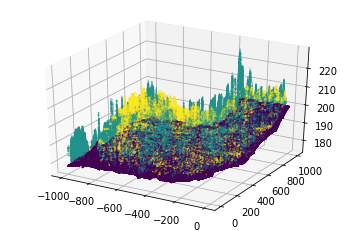

In [ ]:
# plotting the results 3D
ax = plt.axes(projection='3d')
ax.scatter(X_test['X'], X_test['Y'], X_test['Z'], c = rf_predictions, s=0.1)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

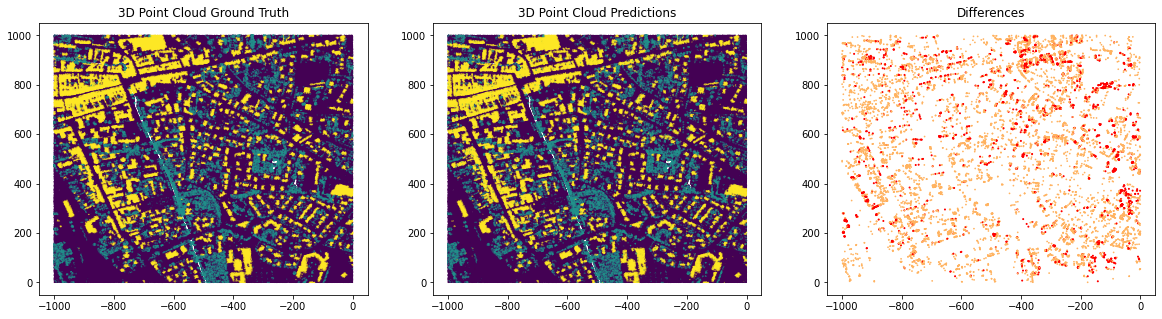

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = rf_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-rf_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-rf_predictions))
axs[2].set_title('Differences')

# Step 4: 3D Machine Learning Tuning

              precision    recall  f1-score   support

      ground       0.92      0.90      0.91    690172
  vegetation       0.88      0.91      0.89    427843
   buildings       0.92      0.92      0.92    233776

    accuracy                           0.91   1351791
   macro avg       0.91      0.91      0.91   1351791
weighted avg       0.91      0.91      0.91   1351791



/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

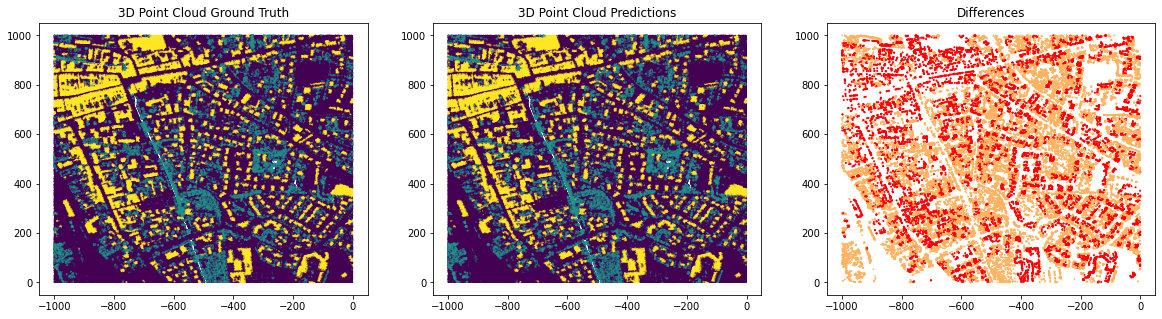

In [ ]:
#Example of a K-Nearest Neighbors Model for 3D Point Cloud Semantic Segmentation
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print(classification_report(y_test, knn_predictions, target_names=['ground','vegetation','buildings']))

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = knn_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-knn_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-knn_predictions))
axs[2].set_title('Differences')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

      ground       0.63      0.74      0.68    690172
  vegetation       0.69      0.74      0.71    427843
   buildings       0.47      0.16      0.24    233776

    accuracy                           0.64   1351791
   macro avg       0.60      0.55      0.55   1351791
weighted avg       0.62      0.64      0.61   1351791



/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

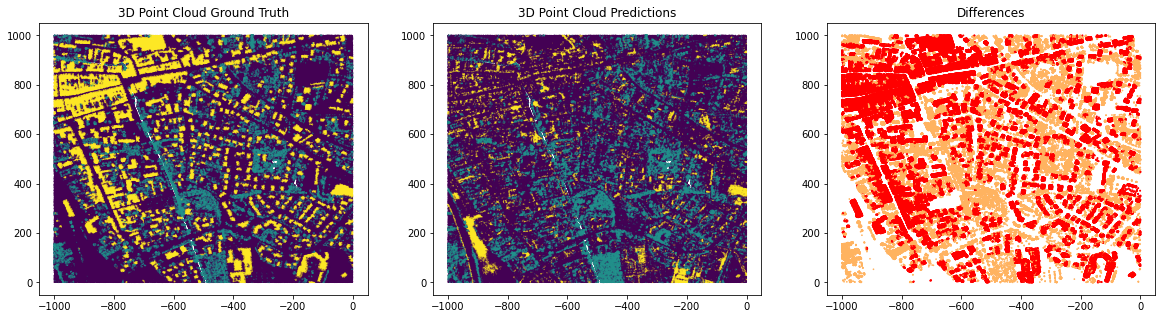

In [ ]:
#Example of a Multi-Layer Perception Model for 3D Point Cloud Semantic Segmentation
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, 2), random_state=1)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
print(classification_report(y_test, mlp_predictions, target_names=['ground','vegetation','buildings']))

fig, axs = plt.subplots(1, 3, figsize=(20,5)) # row 1, col 2 index 1
# fig, ax = plt.subplots(nrows=1, ncols=2)
axs[0].scatter(X_test['X'], X_test['Y'], c =y_test, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(X_test['X'], X_test['Y'], c = mlp_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(X_test['X'], X_test['Y'], c = y_test-mlp_predictions, cmap = plt.cm.rainbow, s=0.5*(y_test-mlp_predictions))
axs[2].set_title('Differences')

# Step 5: 3D Machine Learning Performance. Towards Generalization

In [ ]:
val_dataset="3DML_validation.xyz"
val_pcd=pd.read_csv(data_folder+val_dataset,delimiter=' ')
val_pcd.dropna(inplace=True)

In [ ]:
val_labels=val_pcd['Classification']
val_features=val_pcd[['X','Y','Z','R','G','B']]
val_predictions = rf_classifier.predict(val_features)
print(classification_report(val_labels, val_predictions, target_names=['ground','vegetation','buildings']))

              precision    recall  f1-score   support

      ground       0.48      0.53      0.50   1188768
  vegetation       0.58      0.57      0.57   1315231
   buildings       0.52      0.44      0.48    613317

    accuracy                           0.53   3117316
   macro avg       0.53      0.51      0.52   3117316
weighted avg       0.53      0.53      0.53   3117316



/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

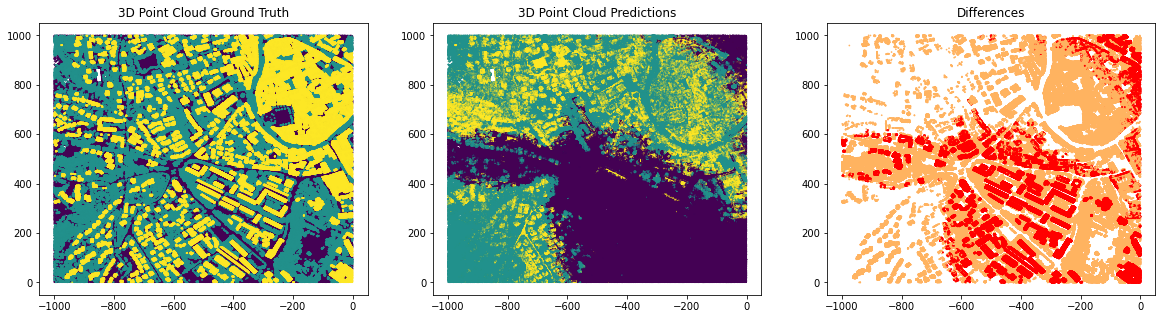

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,5)) # row 1, col 2 index 1
# fig, ax = plt.subplots(nrows=1, ncols=2)
axs[0].scatter(val_features['X'], val_features['Y'], c =val_labels, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(val_features['X'], val_features['Y'], c = val_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(val_features['X'], val_features['Y'], c = val_labels-val_predictions, cmap = plt.cm.rainbow, s=0.5*(val_labels-val_predictions))
axs[2].set_title('Differences')

              precision    recall  f1-score   support

      ground       0.97      0.98      0.98    690449
  vegetation       0.97      0.98      0.97    427636
   buildings       0.95      0.91      0.93    233706

    accuracy                           0.97   1351791
   macro avg       0.97      0.96      0.96   1351791
weighted avg       0.97      0.97      0.97   1351791

              precision    recall  f1-score   support

      ground       0.89      0.81      0.85   1188768
  vegetation       0.92      0.92      0.92   1315231
   buildings       0.69      0.79      0.74    613317

    accuracy                           0.85   3117316
   macro avg       0.83      0.84      0.83   3117316
weighted avg       0.86      0.85      0.86   3117316



/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

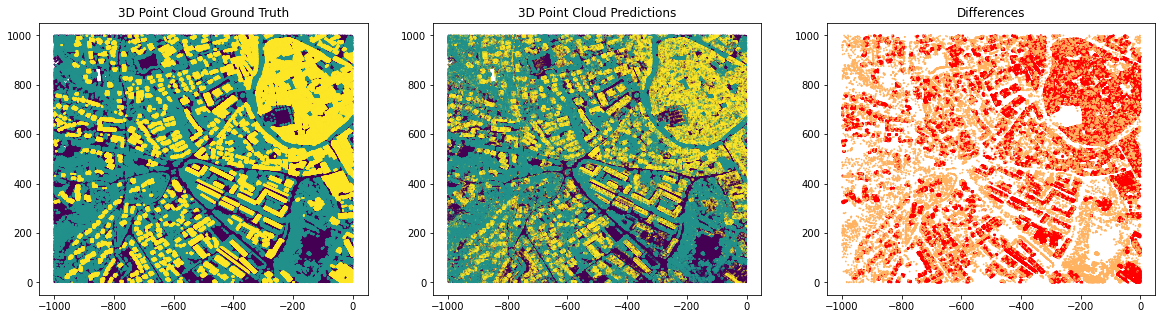

In [ ]:
labels=pcd['Classification']
features=pcd[['Z','R','G','B','omnivariance_2','normal_cr_2','NumberOfReturns','planarity_2','omnivariance_1','verticality_1']]
features_scaled = MinMaxScaler().fit_transform(features)

val_labels=val_pcd['Classification']
val_features=val_pcd[['Z','R','G','B','omnivariance_2','normal_cr_2','NumberOfReturns','planarity_2','omnivariance_1','verticality_1']]
val_features_scaled = MinMaxScaler().fit_transform(val_features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.4)
rf_classifier = RandomForestClassifier(n_estimators = 10)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print(classification_report(y_test, rf_predictions, target_names=['ground','vegetation','buildings']))

val_rf_predictions = rf_classifier.predict(val_features_scaled)
print(classification_report(val_labels, val_rf_predictions, target_names=['ground','vegetation','buildings']))

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(val_pcd['X'], val_pcd['Y'], c =val_labels, s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(val_pcd['X'], val_pcd['Y'], c = val_rf_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(val_pcd['X'], val_pcd['Y'], c = val_labels-val_rf_predictions, cmap = plt.cm.rainbow, s=0.5*(val_labels-val_rf_predictions))
axs[2].set_title('Differences')

              precision    recall  f1-score   support

      ground       0.97      0.98      0.97    737270
  vegetation       0.97      0.97      0.97    481408
   buildings       0.94      0.90      0.92    257806

    accuracy                           0.96   1476484
   macro avg       0.96      0.95      0.95   1476484
weighted avg       0.96      0.96      0.96   1476484

              precision    recall  f1-score   support

      ground       0.88      0.92      0.90   1069834
  vegetation       0.93      0.94      0.94   1183608
   buildings       0.87      0.79      0.83    552143

    accuracy                           0.90   2805585
   macro avg       0.90      0.88      0.89   2805585
weighted avg       0.90      0.90      0.90   2805585

              precision    recall  f1-score   support

      ground       0.89      0.92      0.90   1188768
  vegetation       0.93      0.95      0.94   1315231
   buildings       0.88      0.79      0.83    613317

    accuracy        

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Differences')

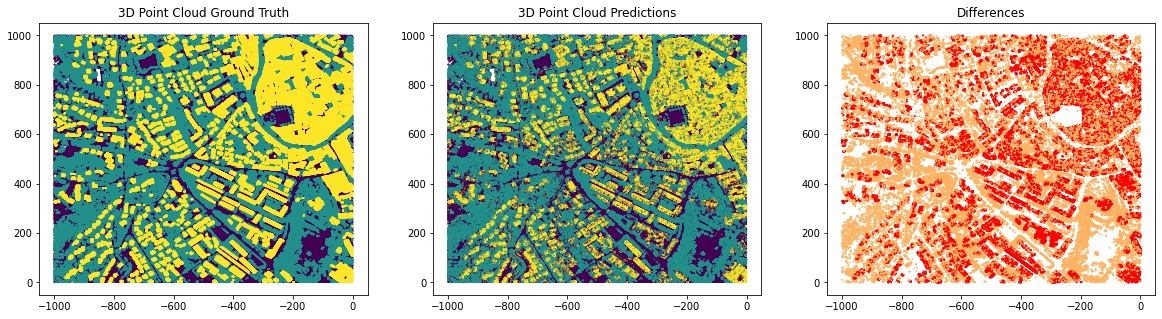

In [ ]:
val_labels=val_pcd['Classification']
val_features=val_pcd[['Z','R','G','B','omnivariance_2','normal_cr_2','NumberOfReturns','planarity_2','omnivariance_1','verticality_1']]
val_features_sampled, val_features_test, val_labels_sampled, val_labels_test = train_test_split(val_features, val_labels, test_size=0.9)
val_features_scaled_sample = MinMaxScaler().fit_transform(val_features_test)

labels=pd.concat([pcd['Classification'],val_labels_sampled])
features=pd.concat([pcd[['Z','R','G','B','omnivariance_2','normal_cr_2','NumberOfReturns','planarity_2','omnivariance_1','verticality_1']],val_features_sampled])
features_scaled = MinMaxScaler().fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.4)
rf_classifier = RandomForestClassifier(n_estimators = 10)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

print(classification_report(y_test, rf_predictions, target_names=['ground','vegetation','buildings']))


val_rf_predictions_90 = rf_classifier.predict(val_features_scaled_sample)
print(classification_report(val_labels_test, val_rf_predictions_90, target_names=['ground','vegetation','buildings']))


val_features_scaled = MinMaxScaler().fit_transform(val_features)
val_rf_predictions = rf_classifier.predict(val_features_scaled)
print(classification_report(val_labels, val_rf_predictions, target_names=['ground','vegetation','buildings']))

# val_pcd['predictions']=val_rf_predictions
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].scatter(val_pcd['X'], val_pcd['Y'], c =val_pcd['Classification'], s=0.05)
axs[0].set_title('3D Point Cloud Ground Truth')
axs[1].scatter(val_pcd['X'], val_pcd['Y'], c = val_rf_predictions, s=0.05)
axs[1].set_title('3D Point Cloud Predictions')
axs[2].scatter(val_pcd['X'], val_pcd['Y'], c = val_pcd['Classification']-val_rf_predictions, cmap = plt.cm.rainbow, s=0.5*(val_pcd['Classification']-val_rf_predictions))
axs[2].set_title('Differences')